In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
df= pd.read_csv("train_ctrUa4K.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df1= pd.read_csv("test_lAUu6dG.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_original=df.copy()
test_original=df1.copy()

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [6]:
df.shape

(614, 13)

In [7]:
df1.shape

(367, 12)

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
data=[df,df1]
for dataset in data:
    #FILTER CATEGORICAL VARIABLES
    categorical_columns=[x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    #EXCLUDE ID COLS AND SOURCE:
    categorical_columns =[x for x in categorical_columns if x not in['Loan_ID']]
    
    
    #PRINT FREQUENCY OF CATEGORIES
for col in categorical_columns:
    print('\nFrequency of categories for variable %s'%col)
    print(df[col].value_counts())


Frequency of categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

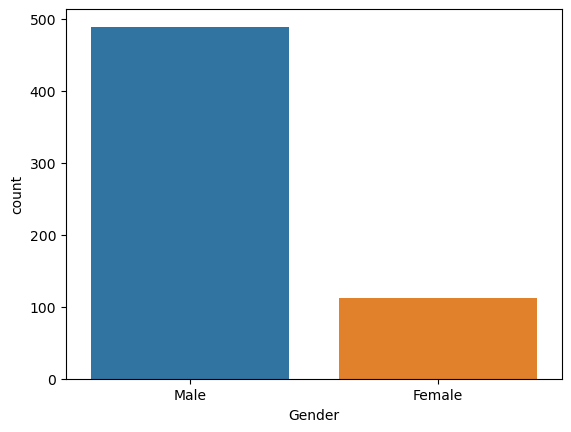

In [15]:
sns.countplot(df['Gender'])

In [16]:
pd.crosstab(df.Gender, df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


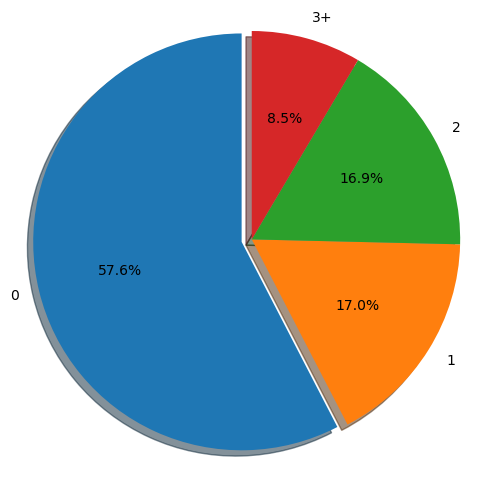

In [17]:
plt.figure(figsize=(6,6))
labels=['0','1','2','3+']
explode=(0.05,0,0,0)
size=[345,102,101,51]
plt.pie(size,explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()


In [18]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
pd.crosstab(df.Dependents,df.Loan_Status,margins=True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

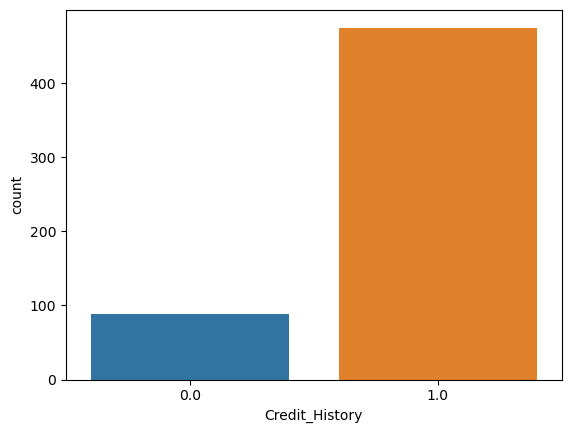

In [20]:
sns.countplot(df['Credit_History'])

In [21]:
pd.crosstab(df.Credit_History,df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

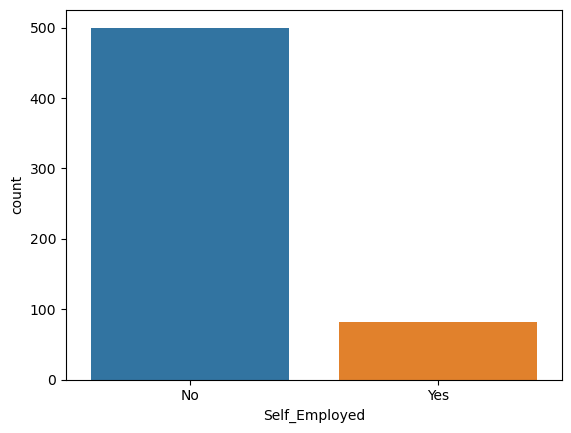

In [22]:
sns.countplot(df['Self_Employed'])

In [23]:
pd.crosstab(df.Self_Employed, df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


<AxesSubplot:xlabel='Married', ylabel='count'>

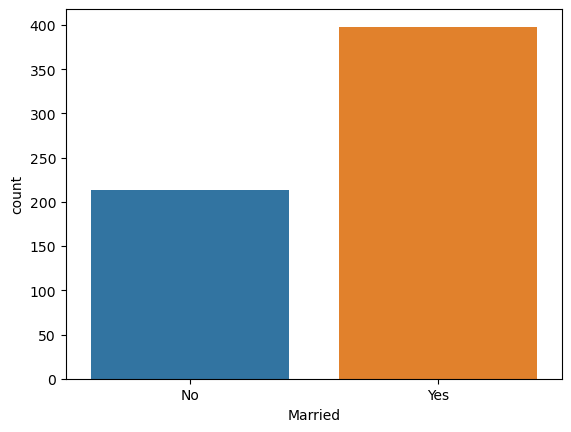

In [24]:
sns.countplot(df.Married)

In [25]:
pd.crosstab(df.Married, df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


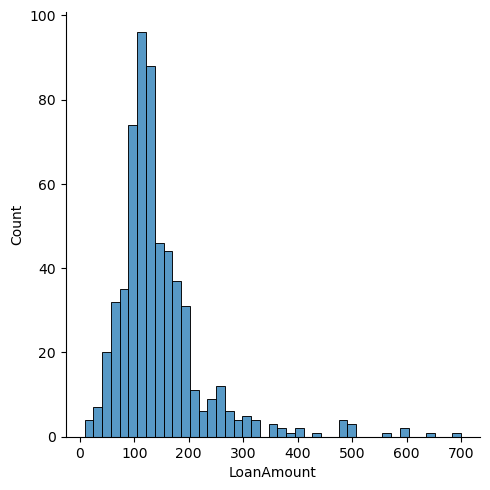

In [26]:
sns.displot(df['LoanAmount'])

<AxesSubplot:xlabel='Education', ylabel='count'>

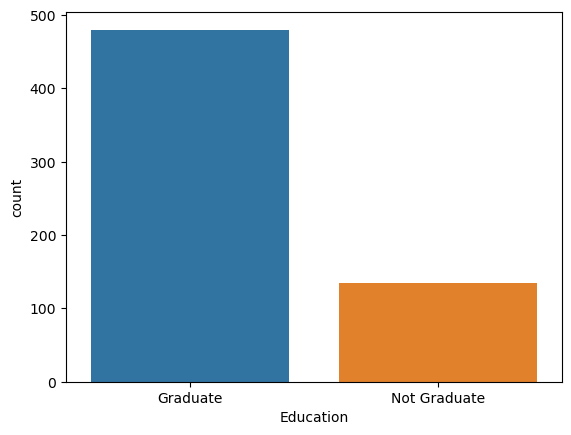

In [27]:
sns.countplot(df.Education)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

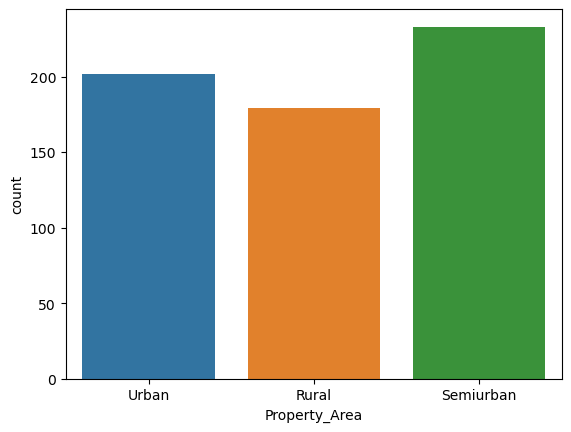

In [28]:
sns.countplot(df.Property_Area)

<AxesSubplot:>

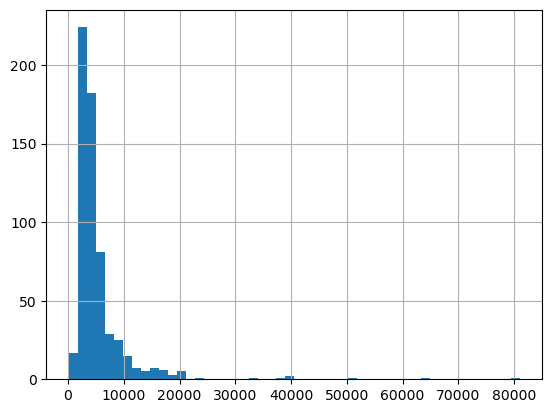

In [29]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

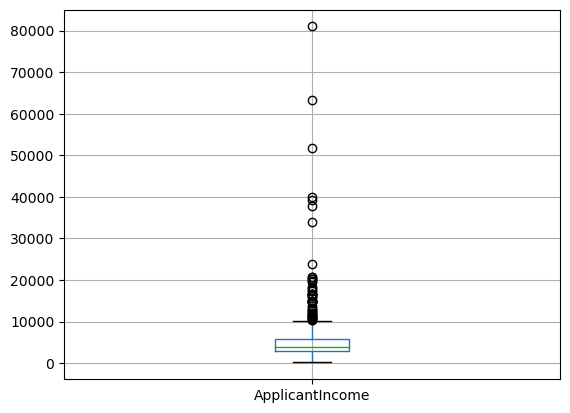

In [30]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

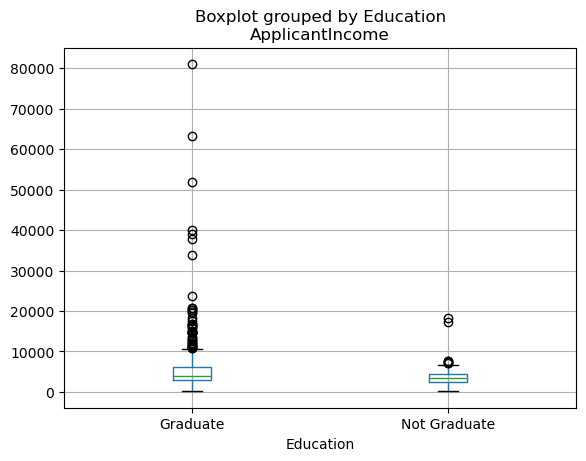

In [31]:
df.boxplot(column='ApplicantIncome',by='Education')

In [32]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc= lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print('\n probability of getting loan for each credit history class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 probability of getting loan for each credit history class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

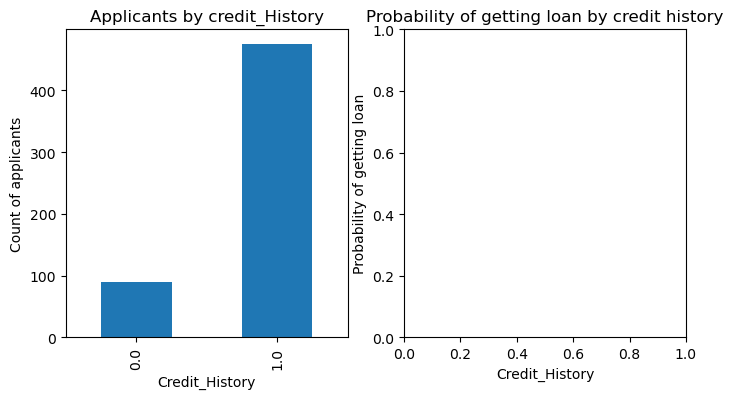

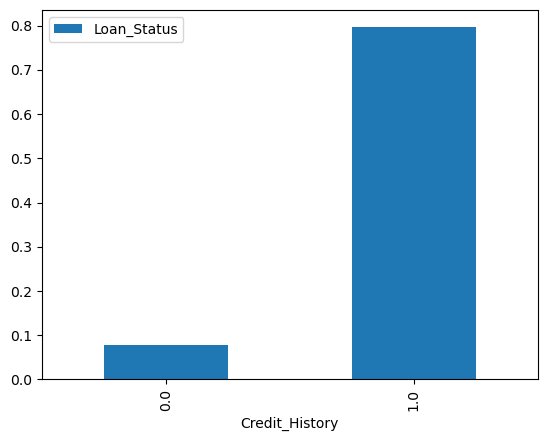

In [33]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of applicants')
ax1.set_title("Applicants by credit_History")
temp1.plot(kind='bar')
ax2=fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

<AxesSubplot:xlabel='Credit_History'>

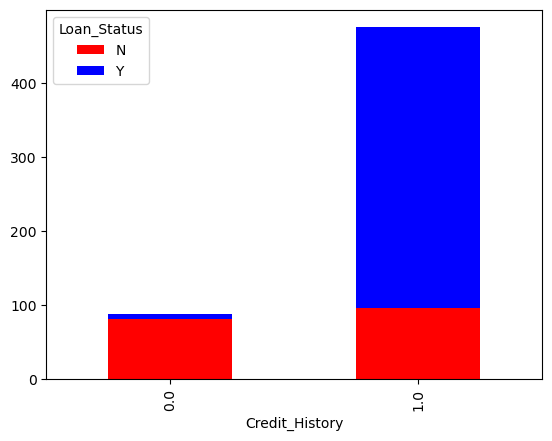

In [34]:
temp3=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True, color=['red','blue'],grid=False)

In [35]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [37]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:>

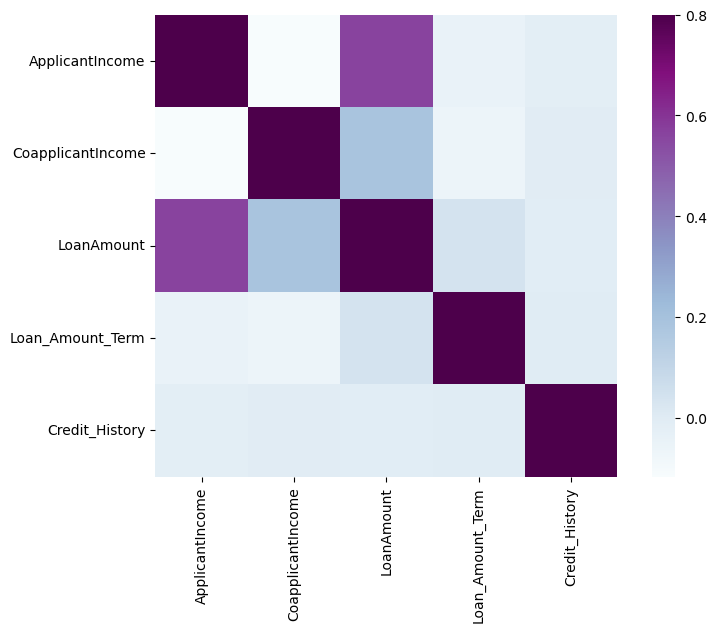

In [38]:
matrix=df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")


In [39]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [41]:
df.Gender=df.Gender.map({"Female":0,"Male":1})
df.Married=df.Married.map({"No":0,"Yes":1})
df.Self_Employed=df.Self_Employed.map({"No":0,"Yes":1})
df.Education=df.Education.map({"Not":1,"Graduate":0})
df.Property_Area=df.Property_Area.map({"Urban":0,"Rural":1})
df.Loan_Status=df.Loan_Status.map({"N":0,"Y":1})
df.Dependents=df.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,NaN,0.0,2583,2358.0,120.000000,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,0.0,1


In [43]:
df1.Gender=df1.Gender.map({"Female":0,"Male":1})
df1.Married=df1.Married.map({"No":0,"Yes":1})
df1.Self_Employed=df1.Self_Employed.map({"No":0,"Yes":1})
df1.Education=df1.Education.map({"Not":1,"Graduate":0})
df1.Property_Area=df1.Property_Area.map({"Urban":0,"Rural":1})
df1.Dependents=df1.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [44]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,0.0,0.0,5720,0,110.0,360.0,1.0,0.0
1,LP001022,1.0,1,1.0,0.0,0.0,3076,1500,126.0,360.0,1.0,0.0
2,LP001031,1.0,1,2.0,0.0,0.0,5000,1800,208.0,360.0,1.0,0.0
3,LP001035,1.0,1,2.0,0.0,0.0,2340,2546,100.0,360.0,NaN,0.0
4,LP001051,1.0,0,0.0,NaN,0.0,3276,0,78.0,360.0,1.0,0.0


In [45]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Education"].fillna(df["Education"].mode()[0],inplace=True)
df["Property_Area"].fillna(df["Property_Area"].mode()[0],inplace=True)

In [46]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

In [48]:
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

In [49]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
df1.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education             84
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area        116
dtype: int64

In [51]:
df1["Gender"].fillna(df1["Gender"].mode()[0],inplace=True)
df1["Married"].fillna(df1["Married"].mode()[0],inplace=True)
df1["Dependents"].fillna(df1["Dependents"].mode()[0],inplace=True)
df1["Self_Employed"].fillna(df1["Self_Employed"].mode()[0],inplace=True)
df1["Credit_History"].fillna(df1["Credit_History"].mode()[0],inplace=True)
df1["Education"].fillna(df1["Education"].mode()[0],inplace=True)
df1["Property_Area"].fillna(df1["Property_Area"].mode()[0],inplace=True)

In [52]:
df1["Loan_Amount_Term"].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [53]:
df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].mode()[0],inplace=True)

In [54]:
df1["LoanAmount"].fillna(df1["LoanAmount"].median(),inplace=True)

In [55]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [56]:
df['Total_Income']=df["ApplicantIncome"]+df['CoapplicantIncome']
df1['Total_Income']=df1["ApplicantIncome"]+df1['CoapplicantIncome']

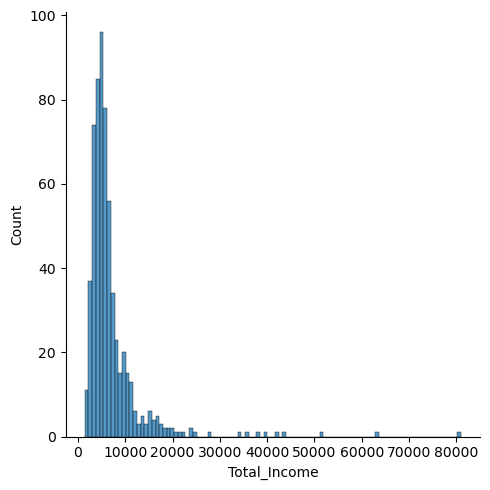

In [57]:
sns.displot(df["Total_Income"])

In [58]:
df['Total_Income_log']=np.log(df["Total_Income"])
df1['Total_Income_log']=np.log(df1["Total_Income"])

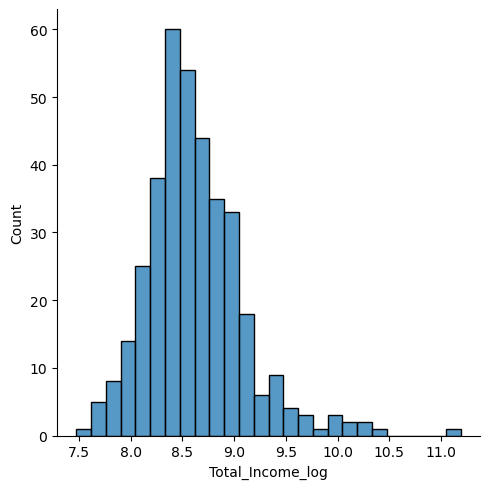

In [59]:
sns.displot(df1["Total_Income_log"])

In [60]:
df['EMI']=df["LoanAmount"]/df['Loan_Amount_Term']
df1['EMI']=df1["LoanAmount"]/df1['Loan_Amount_Term']

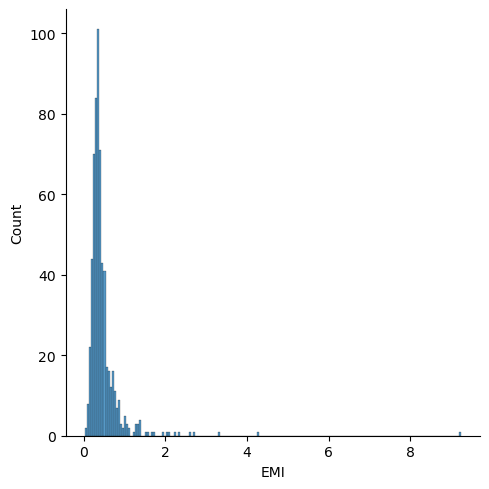

In [61]:
sns.displot(df["EMI"])

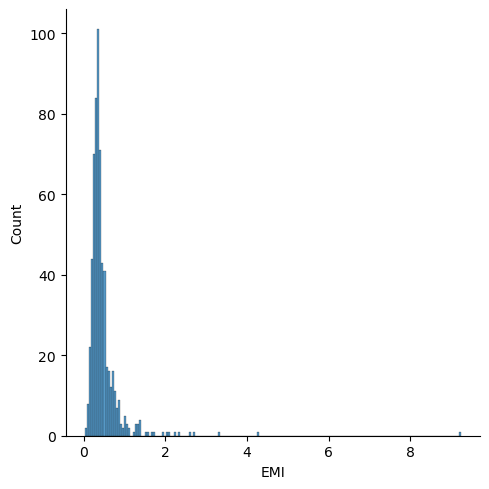

In [62]:
sns.displot(df["EMI"])

In [63]:
df['Balance Income']=df["Total_Income"]-(df['EMI']*1000)
df1['Balance Income']=df1["Total_Income"]-(df1['EMI']*1000)

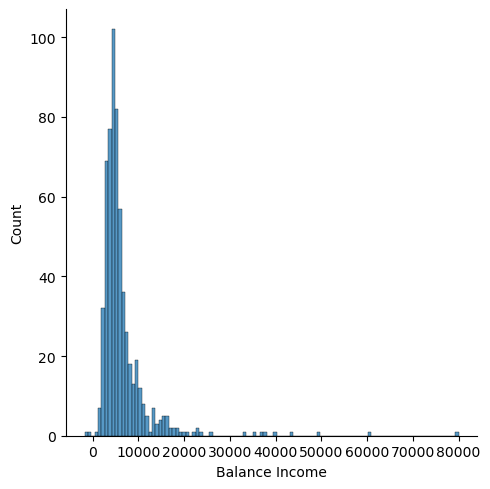

In [64]:
sns.displot(df["Balance Income"])

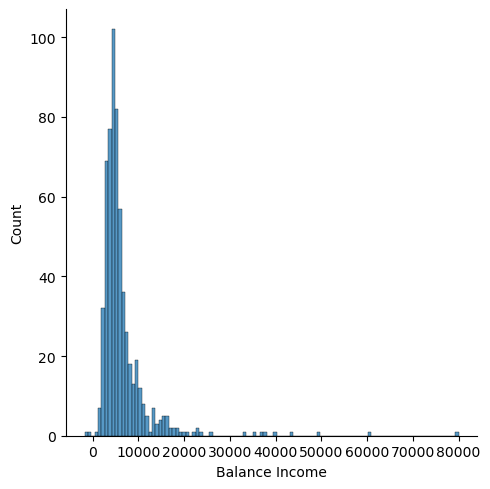

In [65]:
sns.displot(df["Balance Income"])

In [66]:
df=df.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5849.0,8.674026,0.406700,5442.299550
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6000.0,8.699515,0.391667,5608.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,2900.0,7.972466,0.197222,2702.777778
610,1.0,1.0,3.0,0.0,0.0,1.0,1.0,1,4106.0,8.320205,0.222222,3883.777778
611,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1,8312.0,9.025456,0.702778,7609.222222
612,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1,7583.0,8.933664,0.519444,7063.555556


In [67]:
df.dtypes

Gender              float64
Married             float64
Dependents          float64
Education           float64
Self_Employed       float64
Credit_History      float64
Property_Area       float64
Loan_Status           int64
Total_Income        float64
Total_Income_log    float64
EMI                 float64
Balance Income      float64
dtype: object

In [68]:
df1=df1.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [69]:
df1=df1.drop("Loan_ID",axis=1)
df1

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,0.0,0.0,0.0,1.0,0.0,5720,8.651724,0.305556,5414.444444
1,1.0,1,1.0,0.0,0.0,1.0,0.0,4576,8.428581,0.350000,4226.000000
2,1.0,1,2.0,0.0,0.0,1.0,0.0,6800,8.824678,0.577778,6222.222222
3,1.0,1,2.0,0.0,0.0,1.0,0.0,4886,8.494129,0.277778,4608.222222
4,1.0,0,0.0,0.0,0.0,1.0,0.0,3276,8.094378,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3.0,0.0,1.0,1.0,0.0,5786,8.663196,0.313889,5472.111111
363,1.0,1,0.0,0.0,0.0,1.0,0.0,4867,8.490233,0.319444,4547.555556
364,1.0,0,0.0,0.0,0.0,1.0,0.0,5243,8.564649,0.350000,4893.000000
365,1.0,1,0.0,0.0,0.0,1.0,1.0,7393,8.908289,0.438889,6954.111111


In [70]:
df1.dtypes

Gender              float64
Married               int64
Dependents          float64
Education           float64
Self_Employed       float64
Credit_History      float64
Property_Area       float64
Total_Income          int64
Total_Income_log    float64
EMI                 float64
Balance Income      float64
dtype: object

# Preprocessing

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [72]:
x=df.drop("Loan_Status",1)
y=df.Loan_Status

In [73]:
x=pd.get_dummies(x)
df=pd.get_dummies(df)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
pred_l=logmodel.predict(x_test)
acc_l=accuracy_score(y_test,pred_l)*100
acc_l

74.05405405405405

# KNN

In [76]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
acc_knn=accuracy_score(y_test,pred_knn)
acc_knn

0.5945945945945946

# DecisionTreeClassifer

In [77]:
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt=dt_cls.predict(x_test)               

In [78]:
confusion_matrix(y_test,y_pred_dt)

array([[ 38,  27],
       [ 18, 102]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred_dt)

0.7567567567567568

# RandomForestClassifier

In [80]:
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test) 

In [81]:
confusion_matrix(y_test,y_pred_rf)

array([[ 30,  35],
       [  9, 111]], dtype=int64)

In [82]:
accuracy_score(y_test,y_pred_rf)

0.7621621621621621

# SVM

In [83]:
from sklearn.svm import SVC

In [84]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [87]:
confusion_matrix(y_test,y_pred_svm)

array([[ 14,  51],
       [  0, 120]], dtype=int64)

In [88]:
accuracy_score(y_test,y_pred_svm)

0.7243243243243244

# Submission of data

In [128]:
pred_test=rf_cls.predict(df1)   sample_submission_49d68Cx.csv

In [131]:
submission = pd.read_csv('C:\\Users\\AARATHI R NAIR\\Desktop\\sample_submission_49d68Cx.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [132]:
submisson=pd.DataFrame({"Loan_ID":test_original["Loan_ID"],"Loan_Status":pred_test})

In [133]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [134]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [135]:
submission.head(50)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [136]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv')

In [137]:
pd.read_csv("RandomForest.csv")

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
...,...,...,...
362,362,LP002971,Y
363,363,LP002975,Y
364,364,LP002980,Y
365,365,LP002986,Y


In [139]:
df.to_csv("C:\\Users\\AARATHI R NAIR\\Desktop\\RandomForest.csv")